## Gas cap MBE
# F = N[Eo +m Eg]

The way in which this equation can be used depends on the number of unknowns in the equation. There are three possible unknown in this equation.
#1.N is unknown, m is known
#2.m is unknown, N is known
#3.N and m are unknown

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

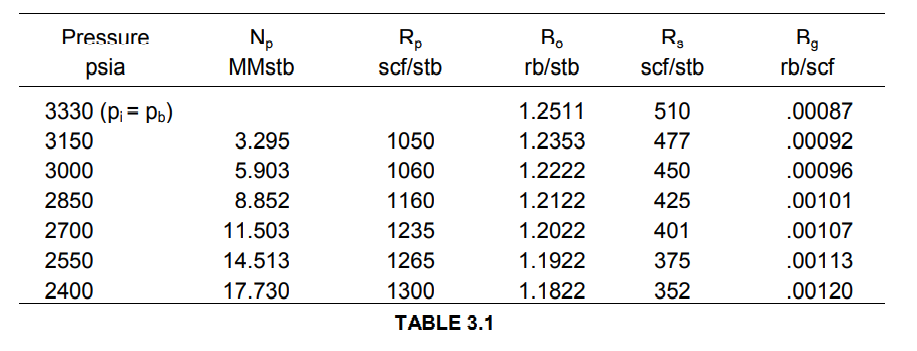


In [2]:
avrage_pressure = [3330,3150,3000,2850,2700,2550,2400]
Np = [0,3.295,5.903,8.852,11.503,14.513,17.73]
Gp = [0,3459.75,6257.18,10268.32,14206.205,18358.945,23049]
Bo = [1.2511,1.2353,1.2222,1.2122,1.2022,1.1922,1.1822]
Bg = [0.00087,0.00092,0.00096,0.00101,0.00107,0.00113,0.00120]
Rs = [510,477,450,425,401,375,352]
Rsi = 510
Boi = 1.2511
Bgi = 0.00087

In [3]:
df = pd.DataFrame({"avrage_pressure_psi" : avrage_pressure , "oil_production_MMSTB" : Np, "gas_production_MMscf" : Gp, "Bo_rb/stb" : Bo, "Bg_rb/scf" : Bg,"Rs_scf/stb" : Rs })  

In [4]:
df

,avrage_pressure_psi,oil_production_MMSTB,gas_production_MMscf,Bo_rb/stb,Bg_rb/scf,Rs_scf/stb
0,3330,0.000,0.000,1.2511,0.00087,510
1,3150,3.295,3459.750,1.2353,0.00092,477
2,3000,5.903,6257.180,1.2222,0.00096,450
3,2850,8.852,10268.320,1.2122,0.00101,425
4,2700,11.503,14206.205,1.2022,0.00107,401
5,2550,14.513,18358.945,1.1922,0.00113,375
6,2400,17.730,23049.000,1.1822,0.00120,352


In [5]:
Rp = df.gas_production_MMscf/df.oil_production_MMSTB

In [6]:
df["cumulative_GOR"]= Rp

In [7]:
F = df.oil_production_MMSTB*(df['Bo_rb/stb'] + (df.cumulative_GOR - Rs ) * df['Bg_rb/scf'] )

In [8]:
Eo = df["Bo_rb/stb"] - Boi + (Rsi - df["Rs_scf/stb"] ) * df['Bg_rb/scf']

In [9]:
Eg = Boi *(df['Bg_rb/scf']/Bgi - 1)

In [10]:
df["F (MMbbl)"] = F 
df["Eo (rb/stb)"] = Eo
df["Eg (rb/stb) "] = Eg

# 1. N is unknown, m is known

The slop of Eo+mEg v/s F curve give vale of initial oil in place.
 
 Given m = 0.4

In [11]:
m = float(input("enter value of m = "))
mode = np.polyfit((Eo[1:7] + m*Eg[1:7]),F[1:7],1)


enter value of m = 0.4


The Oil Initially in place is 131.43722753924325 MMSTB for m = 0.4 


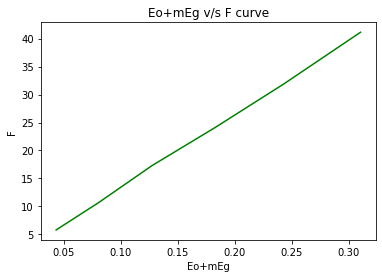

In [12]:
plt.plot(Eo + m * Eg, F, c = "g")
plt.title("Eo+mEg v/s F curve" )
plt.xlabel("Eo+mEg")
plt.ylabel("F")
from matplotlib import style
style.use("ggplot")
print(f"The Oil Initially in place is {mode[0]} MMSTB for m = {m} " )

## 2. m is unknown and N is known

The slop of (F/N - Eo) v/s Eg give value of m
Given N is 114.23665941047993 MMSTB 

In [13]:
N = float(input("enter value of initial oil in place in mmstb = "))
fit = np.polyfit(Eg[1:7],(F[1:7]/N - Eo[1:7]),1)

enter value of initial oil in place in mmstb = 114.23


 m is 0.5000299815969439 for 114.23 Oil Initially in place 


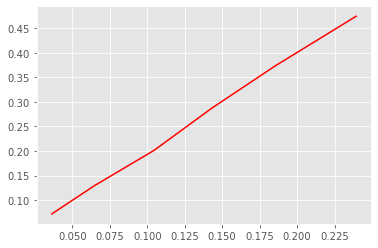

In [14]:
plt.plot((F/N -Eo), Eg , c = "r")
print(f" m is {fit[0]} for {N} Oil Initially in place " )

## 3. N and m are unknown

In [15]:
df['F/Eo'] = df["F (MMbbl)"] *10**6/df["Eo (rb/stb)"]
df["Eg/Eo"] = df["Eg (rb/stb) "]/df["Eo (rb/stb)"]

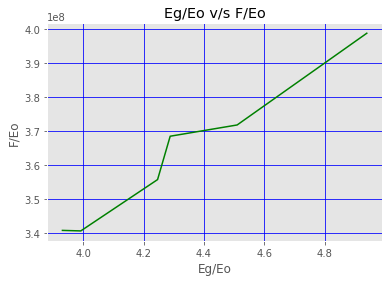

In [16]:
plt.plot(df["Eg/Eo"],df['F/Eo'] ,color = "g", linestyle = "-" )
plt.title("Eg/Eo v/s F/Eo")
plt.xlabel("Eg/Eo")
plt.ylabel("F/Eo")
from matplotlib import style
style.use("ggplot")
plt.grid(True, color = 'b')

In [17]:
model = np.polyfit(df["Eg/Eo"][1:7],df['F/Eo'][1:7],1)


In [18]:
model

array([5.88301338e+07, 1.08702727e+08])

In [19]:
x = df["Eg/Eo"][1:7]
xx = list(x)
xx.append(0)
xx

[4.938344701275751,
 4.509551844286939,
 4.288103019842596,
 4.246407727776458,
 3.992439444986536,
 3.9316915692940655,
 0]

In [20]:
y = []
for i in xx:
    a = model[0] *i + model[1]
    y.append(a)

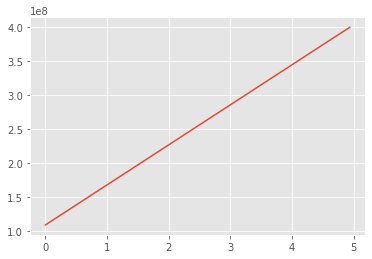

In [21]:
plt.plot(xx,y)
style.use("ggplot")

In [22]:
m = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]
for i in m:
    df[f"Eo + {i}Eg"] = df["Eo (rb/stb)"] + i * df["Eg (rb/stb) "]
df


,avrage_pressure_psi,oil_production_MMSTB,gas_production_MMscf,Bo_rb/stb,Bg_rb/scf,Rs_scf/stb,cumulative_GOR,F (MMbbl),Eo (rb/stb),Eg (rb/stb),F/Eo,Eg/Eo,Eo + 0.2Eg,Eo + 0.3Eg,Eo + 0.4Eg,Eo + 0.5Eg,Eo + 0.6Eg,Eo + 0.7Eg,Eo + 0.8Eg
0,3330,0.000,0.000,1.2511,0.00087,510,NaN,NaN,0.00000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3150,3.295,3459.750,1.2353,0.00092,477,1050.0,5.807306,0.01456,0.071902,3.988534e+08,4.938345,0.028940,0.036131,0.043321,0.050511,0.057701,0.064892,0.072082
2,3000,5.903,6257.180,1.2222,0.00096,450,1060.0,10.671443,0.02870,0.129424,3.718273e+08,4.509552,0.054585,0.067527,0.080470,0.093412,0.106354,0.119297,0.132239
3,2850,8.852,10268.320,1.2122,0.00101,425,1160.0,17.301677,0.04695,0.201326,3.685128e+08,4.288103,0.087215,0.107348,0.127481,0.147613,0.167746,0.187879,0.208011
4,2700,11.503,14206.205,1.2022,0.00107,401,1235.0,24.093954,0.06773,0.287609,3.557353e+08,4.246408,0.125252,0.154013,0.182774,0.211535,0.240296,0.269056,0.297817
5,2550,14.513,18358.945,1.1922,0.00113,375,1265.0,31.898123,0.09365,0.373892,3.406100e+08,3.992439,0.168428,0.205818,0.243207,0.280596,0.317985,0.355374,0.392764
6,2400,17.730,23049.000,1.1822,0.00120,352,1300.0,41.130054,0.12070,0.474555,3.407627e+08,3.931692,0.215611,0.263067,0.310522,0.357978,0.405433,0.452889,0.500344


In [23]:
df["F (MMbbl)"].dtype

dtype('float64')

The Oil Initially in place is 188.064762727839 MMSTB for m = 0.2 
The Oil Initially in place is 154.73409331122426 MMSTB for m = 0.3 
The Oil Initially in place is 131.43722753924325 MMSTB for m = 0.4 
The Oil Initially in place is 114.23665941047993 MMSTB for m = 0.5 
The Oil Initially in place is 101.01658401687224 MMSTB for m = 0.6 
The Oil Initially in place is 90.53868458906517 MMSTB for m = 0.7 
The Oil Initially in place is 82.02999699858653 MMSTB for m = 0.8 


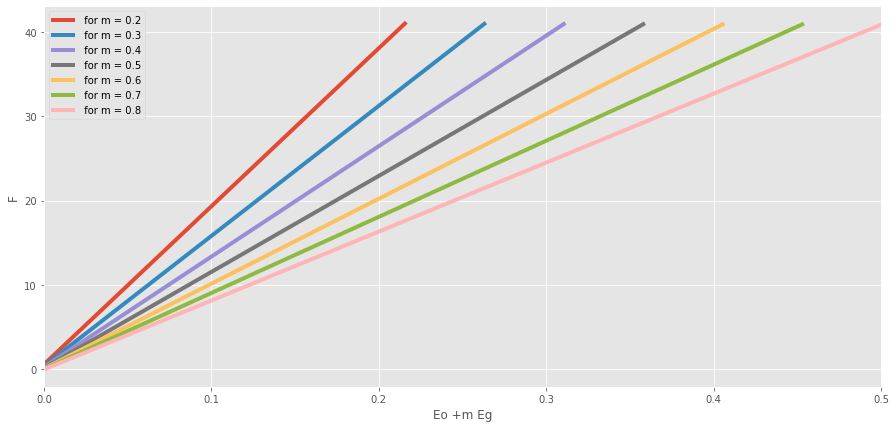

In [24]:
plt.figure(figsize = (15,7))
plt.xlabel("Eo +m Eg")
plt.ylabel("F")
plt.xlim(0,0.5)
plt.style.use("ggplot")
for i in m:
    model = np.polyfit(df[f"Eo + {i}Eg"][1:7],df["F (MMbbl)"][1:7],1)
    n_fitted = []
    for j in df[f"Eo + {i}Eg"]:
        vv = model[0]*j + model[1]
        n_fitted.append(vv)
    plt.plot(df[f"Eo + {i}Eg"],n_fitted, label = f" for m = {i}" , linewidth = 4)
    plt.legend()
    print(f"The Oil Initially in place is {model[0]} MMSTB for m = {i} " )    
        
                         